# CAR PRICE PREDICTION WITH MACHINE LEARNING
The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('car data.csv')

In [2]:
# Inspect the first few rows
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [3]:
# Check for missing values
print(df.isnull().sum())


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [4]:
# Get summary statistics
print(df.describe())


              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [5]:
# Check the data types
print(df.dtypes)


Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


In [6]:
df.shape

(301, 9)

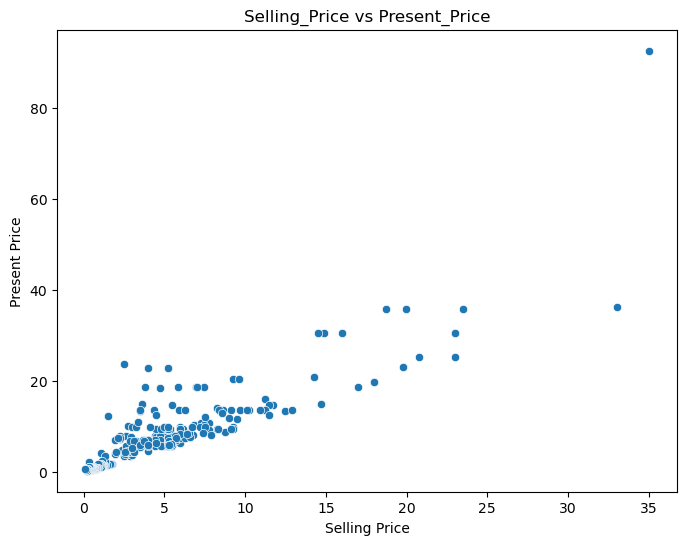

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("Selling_Price vs Present_Price")
sns.scatterplot(x=df['Selling_Price'], y=df['Present_Price'])
plt.xlabel("Selling Price")
plt.ylabel("Present Price")
plt.show()


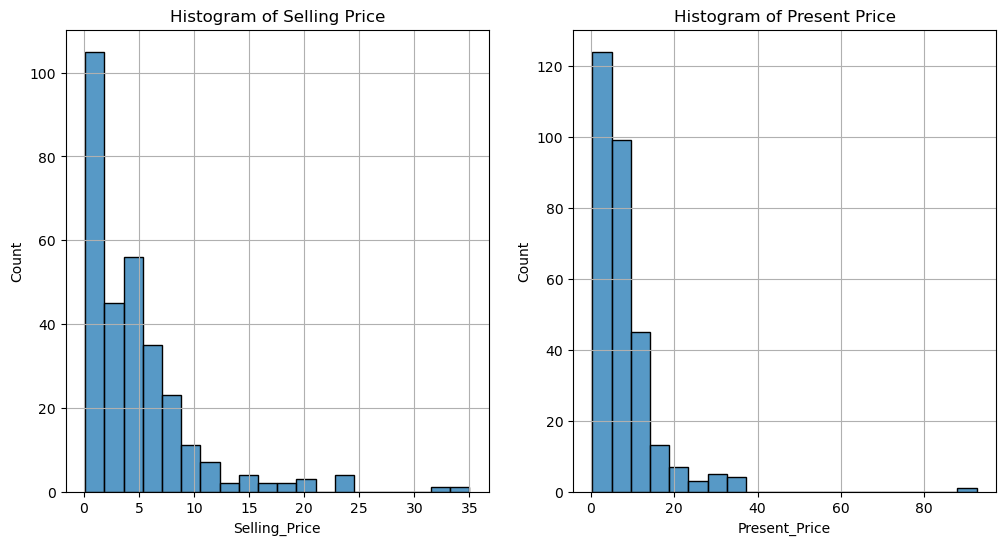

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Histogram for Selling_Price
plt.subplot(1, 2, 1)
plt.title("Histogram of Selling Price")
sns.histplot(df['Selling_Price'], bins=20)
plt.grid(True)


# Histogram for Present_Price
plt.subplot(1, 2, 2)
plt.title("Histogram of Present Price")
sns.histplot(df['Present_Price'], bins=20)

plt.grid(True)
plt.show()


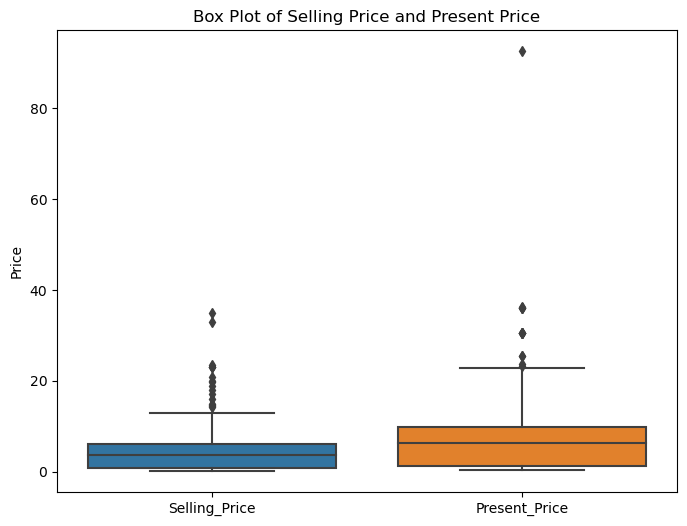

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("Box Plot of Selling Price and Present Price")
sns.boxplot(data=df[['Selling_Price', 'Present_Price']])
plt.ylabel("Price")
plt.show()


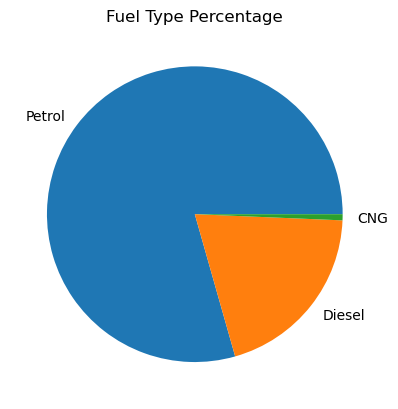

In [10]:
# Fuel type Pie Chart

labels=df['Fuel_Type'].dropna().unique()
plt.pie(df['Fuel_Type'].value_counts(), labels=labels)
plt.title('Fuel Type Percentage')
plt.show()

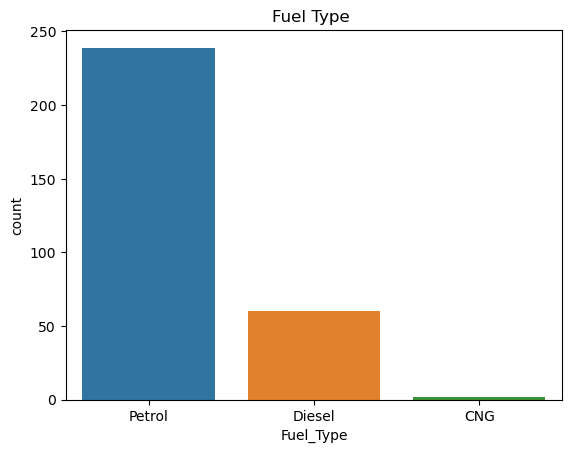

In [11]:
# Fuel type Bar Chart
plt.title('Fuel Type ')
sns.countplot(x='Fuel_Type', data=df)
plt.show()

In [12]:
# Display the value counts for fuel type
print(df['Fuel_Type'].value_counts(dropna=False))

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [13]:
# Encode categorical features
categorical_features = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [16]:
# Split data into features and target variable
x = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [17]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
# Train the model
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Selling_type',
                                                   'Transmission'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [19]:
# Make predictions
y_pred = model.predict(x_test)

In [20]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Mean_Absolute_Error = mean_absolute_error(y_test, y_pred)
Mean_Absolute_Error

0.5954803278688526

In [21]:
Mean_Squared_Error = mean_squared_error(y_test, y_pred)
Mean_Squared_Error

0.7710541483606554

In [22]:
r2 = r2_score(y_test, y_pred)
r2

0.9665276933745053

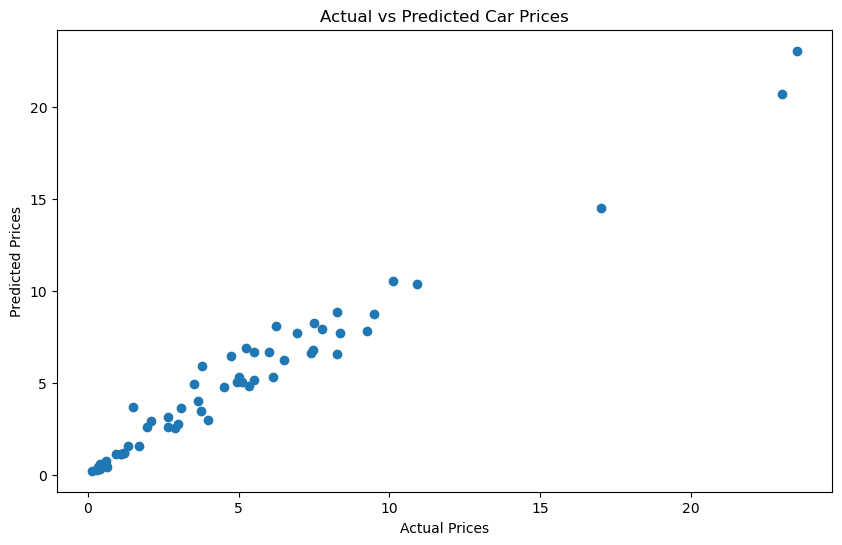

In [23]:
# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()